### Importing the libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Loading the dataset

In [3]:
data = pd.read_csv('Data/austo_automobile.csv')
df = data.copy()

#### Displaying the first 5 rows of the dataset

In [4]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


- *The `Age` Column contains Age of the individual.*
- *The `Gender` column indicates the Gender of the individual.*
- *The `Profession` column contains the profession of individual.*
- *The `Martial Status` column indcates the martial status of the indvidual, married or single.*
- *The `Education` column contains the educational qualification of the individual.*
- *The `No_of_Dependents` column contains the number of people the individual is supporting financially.*
- *The `Personal_loan` column indicates whether the individual has taken a personal loan "Yes" or "No".*
- *The `House_loan` column indicates whether the individual has taken a House loan "Yes" or "No".*
- *The `Partner_working` column indcates the indicates the individual's partner is employed "Yes" or "No".*
- *The `Salary` column contains the salary of the individual and is numeric*
- *The `Partner_salary` column contains the salary of the individual's partner (if applicable).*
- *The `Total_salary` column contains the total salary of the individal and their partner combined.*
- *The `Price` column contains the price of the car or service.*
- *The `Make` column contains the model of the automobile.*



#### Displaying the last 5 element of the dataset

In [5]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


#### Checking the shape of the Dataset

In [6]:
df.shape

(1581, 14)

- *The dataset has 1581 rows and 14 columns*

### **Checking for the non-null values present in the column and the their datatype**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


- *All the columns contains 1581 observations execpt `Gender` and `Partner_salary` are having 1528 and 1475 observations indicating that there are some missing values in them.*
- *The `Partner_salary` is of 'float' but they don't have any values after decimal point and the `Salary` and `Total_salary` column are of the type 'int' soo there might be no dependency so can be converted to 'int'*

### Checking the Statistical summary for the Dataset

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


- *In the `Salary` column the 25th percentile and the 50th percentile are very close to eachother*
- *The `Partner_salary` column has no values in the 1st quartile*
- *The `Total_salary` column has huge difference between 3rd quartile and maximum value there might be some outliers*
- *The `Price` column has wide range of values and the mean is greater than median so might be right skewed*

**Checking for different type of values and their count in the Gender(Categorical) column**

In [9]:
df.Gender.value_counts(dropna=False)

Male      1199
Female     327
NaN         53
Femal        1
Femle        1
Name: Gender, dtype: int64

- *There are some irregularities in the `Gender` column and 53 missing values*

In [10]:
df[df['Gender'] == 'Femal']

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV


- *Since there is only one row having Gender as 'Femal' we ca directly select and change the value*

In [11]:
df.loc[1,'Gender'] = 'Female'

- *Changing the specific row which is having the value having value 'Femal'*

In [12]:
df[df['Gender'] == 'Femle']

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
305,40,Femle,Business,Married,Post Graduate,4,No,No,Yes,70000,70800.0,140800,65000,SUV


- *Since there is only one row having Gender as 'Femle' we ca directly select and change the value*

In [13]:
df.loc[305, 'Gender'] ='Female'

- *Changing the specific row which is having the value having value 'Femle'*

In [14]:
df.Gender.value_counts(dropna=False)

Male      1199
Female     329
NaN         53
Name: Gender, dtype: int64

- *The irregularities present in the `Gender` column are treated and there are only two Male and Female values present in the column*

In [15]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

- *The `Gender` and `Partner_salary` column have 53 and 106 null values, rest of the columns are filled with non null values*

In [16]:
df.Gender.value_counts(normalize= True, dropna= False)

Male      0.758381
Female    0.208096
NaN       0.033523
Name: Gender, dtype: float64

- *There are only 3.4 percent of missing data in `Gender` column and it is categorical, so we can use Mode or Most repeated value to impute data in the column*

In [17]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [18]:
df['Gender'].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

- *Clearly the "Male" value is repeated more number of times so we can mpute the Nan values as "Male"

In [19]:
df['Gender'].fillna("Male", inplace = True)

In [20]:
df["Gender"].value_counts(dropna=False)

Male      1252
Female     329
Name: Gender, dtype: int64

- *The an values are removed and imputed as "Male" in th `Gender` column*

In [21]:
df.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

- *The `Gender` column have only 3 percennt of missing data so it can be dropped*

In [22]:
partner_salary = df['Total_salary'] - df['Salary']

In [23]:
df['Partner_salary'].fillna(partner_salary, inplace = True)

In [24]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

- *The missing values in `Partner_salary` column is imputed by subtracting the `Salary` from `Total_salary`* 

In [25]:
df.duplicated().count()

1581

- *There are no duplicate data in the dataset*

In [26]:
df['Profession'].value_counts(dropna=False)

Salaried    896
Business    685
Name: Profession, dtype: int64

In [27]:
df['Marital_status'].value_counts(dropna=False)

Married    1443
Single      138
Name: Marital_status, dtype: int64

In [28]:
df['Education'].value_counts(dropna=False)

Post Graduate    985
Graduate         596
Name: Education, dtype: int64

- *All the other categorical columns don't have any null values*

## Univariate Analysis

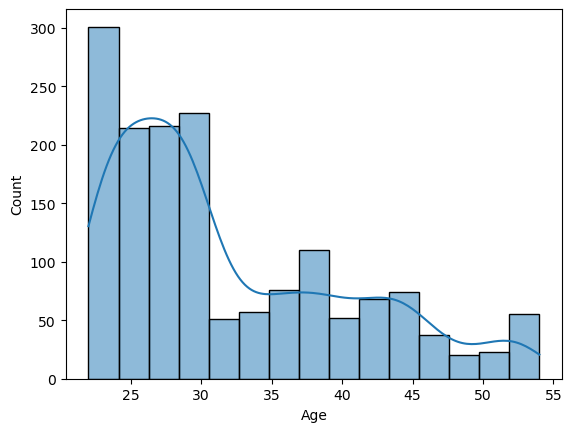

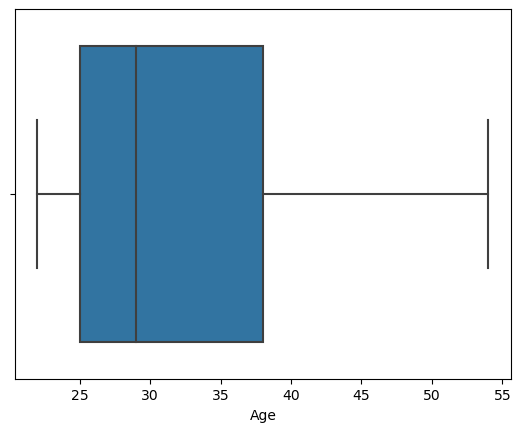

In [29]:
sns.histplot(data= df, x = 'Age',kde= True)
plt.show()
sns.boxplot(data= df, x = 'Age')
plt.show()

- *The Maximum number of customers are from `Age` category of 25 to somewhere around 37*
- *The plot is skewed towards the right(Positively skewed)*
- *Median value of `Age` (is 29 from the .describe table) lies somewhere near 30*

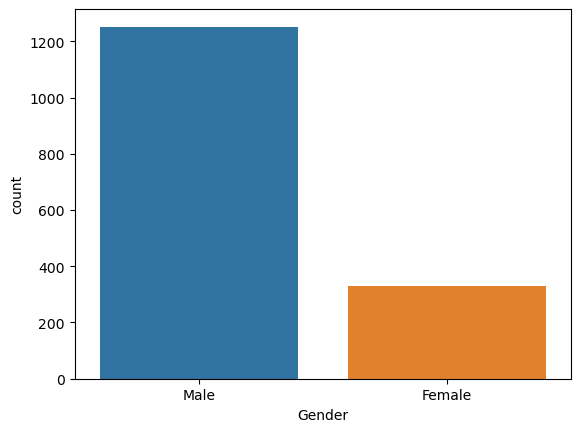

In [30]:
sns.countplot(data= df, x = 'Gender')
plt.show()

- *There are more number of `Male` customers than `Female` customers*

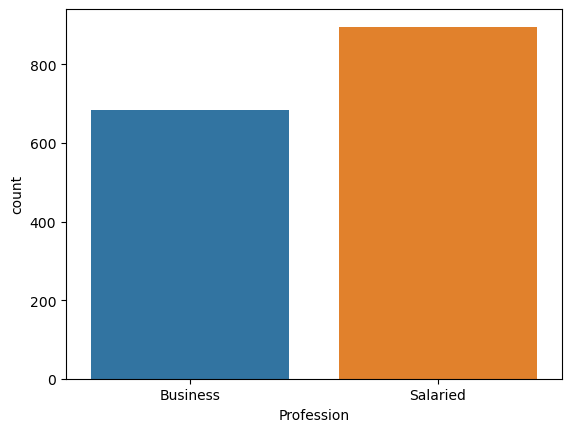

In [31]:
sns.countplot(data= df, x = 'Profession')
plt.show()

- *The people who bought a car are most likely doing a `Salaried` job and there are less people doing `Business` has bought a car*

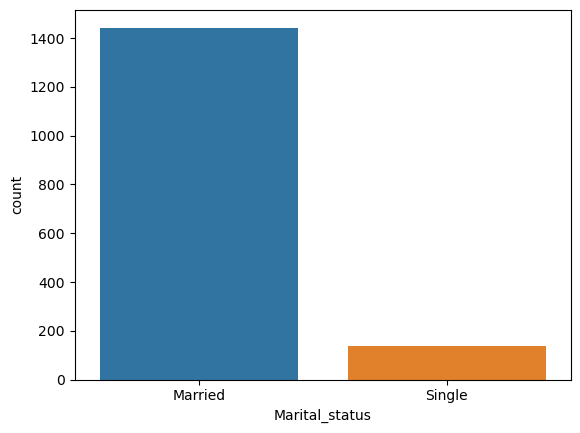

In [32]:
sns.countplot(data=df, x= 'Marital_status')
plt.show()

- *There are more number of `Married` people who bought a car than `Single`*

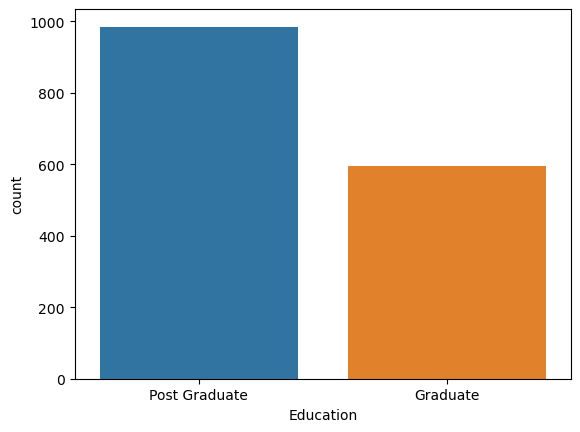

In [33]:
sns.countplot(data=df, x= 'Education')
plt.show()

- *People with `Post Graduation` more likely bought a car than `Graduates`*

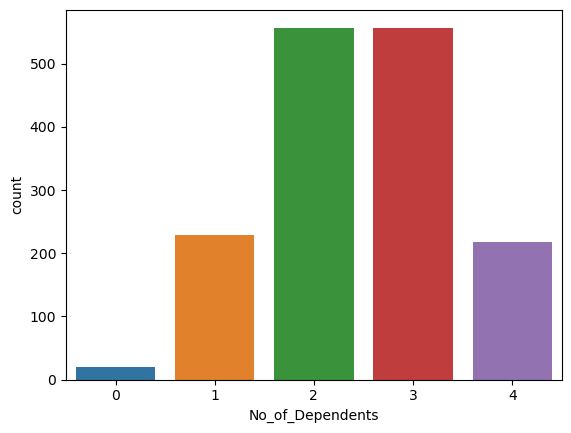

In [34]:
sns.countplot(data=df, x= 'No_of_Dependents')
plt.show()

- *People who has No children are comparatively very less with people having children*
- *People having 1 children and People having 4 children both are almost similar but there is a very small difference*
- *People having 2 children and people having 3 children are equal in count*
- *People with children most likely bought a car*

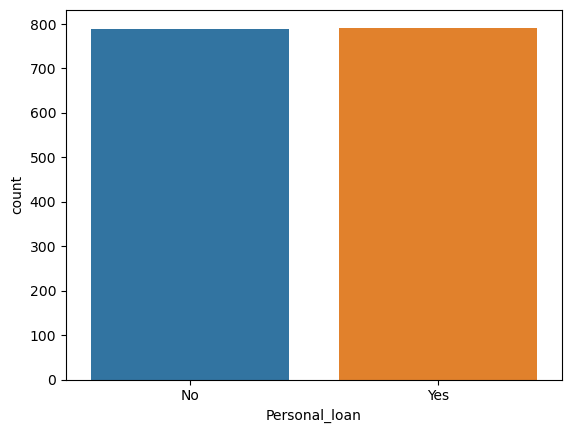

In [35]:
sns.countplot(data=df, x= 'Personal_loan')
plt.show()

- *There is no difference in people having personal loan and people who are not having any personal loan both are equal in number*

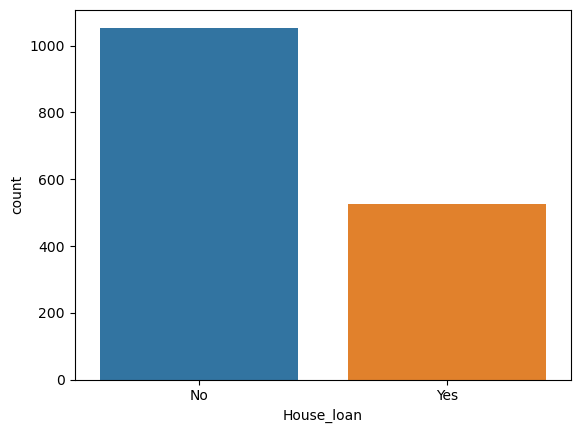

In [36]:
sns.countplot(data=df, x= 'House_loan')
plt.show()

- *There is an interesting insight that people who bought a car and are having Housing loan are less in count*
- *People without House loan and bought a car are more in number*

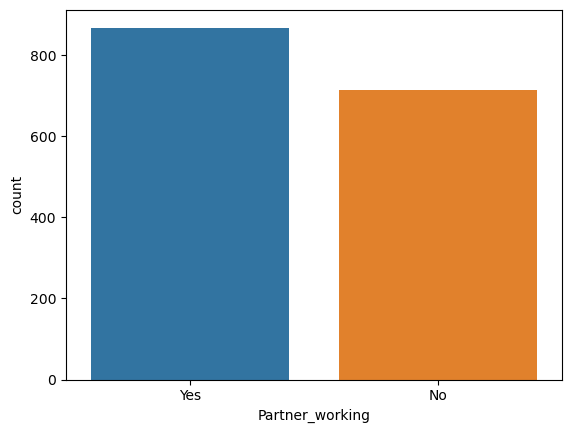

In [37]:
sns.countplot(data=df, x= 'Partner_working')
plt.show()

- *The count of people with their partner working and bought a car are more*
- *It is interesting that the Partner working has less impact in people buying the car, the difference is less compared to Partner not working*

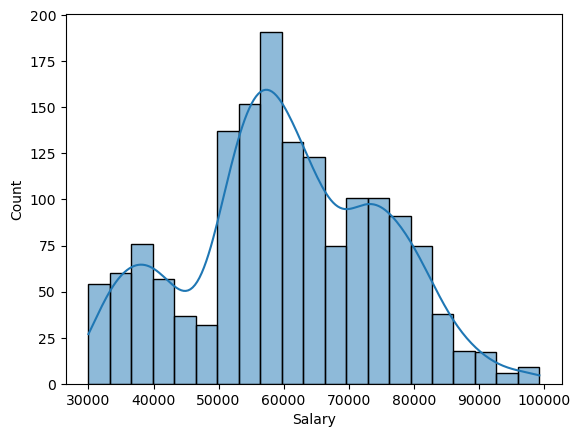

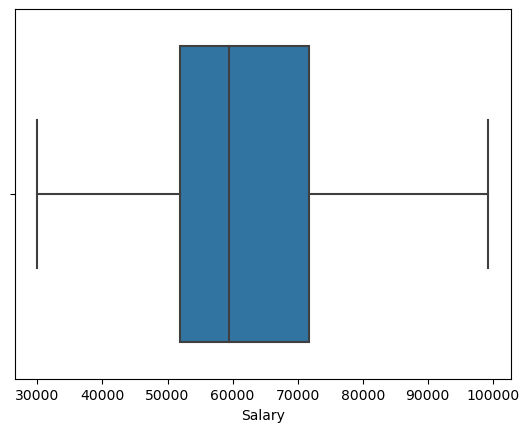

In [38]:
sns.histplot(data= df, x= 'Salary', kde = True)
plt.show()
sns.boxplot(data= df, x= 'Salary')
plt.show()

- *The Average salary of people lies between 50000 and 72000*
- *There are no outliers in this data*

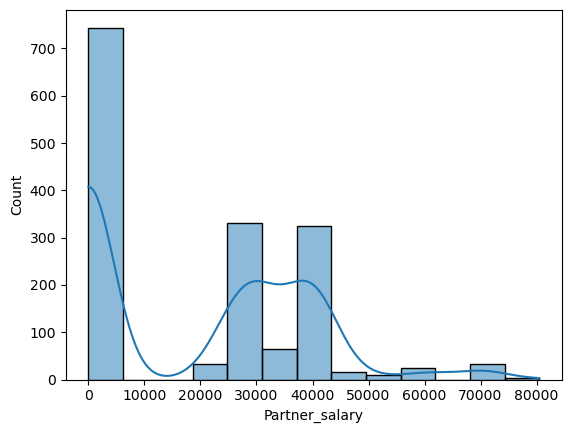

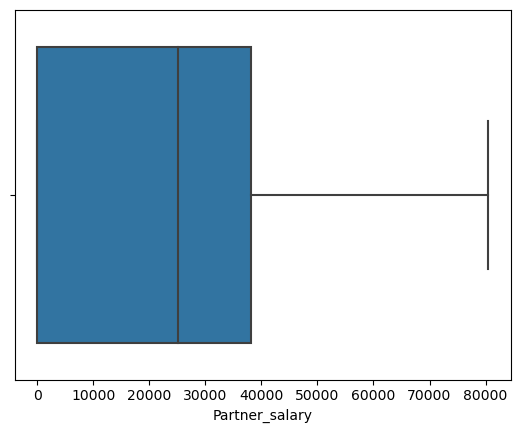

In [39]:
sns.histplot(data= df, x= 'Partner_salary', kde = True)
plt.show()
sns.boxplot(data= df, x= 'Partner_salary')
plt.show()

- *Since ther are more people who's partner are not working the majority of data lies between 0 to 40,000*
- *It will be interesting to see the relationship between `Partner_salary` and `Price` of the car in the Bivariate analysis.*

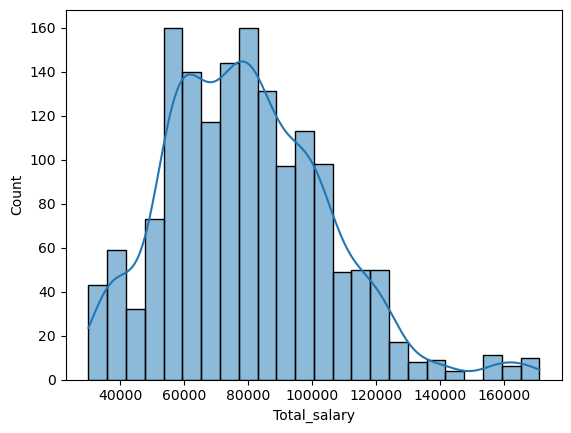

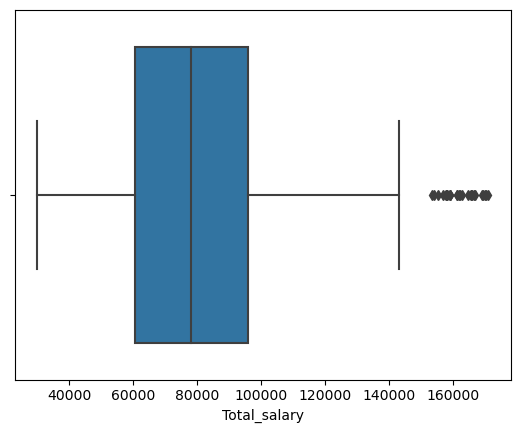

In [40]:
sns.histplot(data= df, x= 'Total_salary', kde = True)
plt.show()
sns.boxplot(data= df, x= 'Total_salary')
plt.show()

- *There are outliers in `Total_salary` that needs to be treated*
- *Most of the Total salary lies between 60,000 to 95,000*

In [41]:
def outliers(col):
    
    Q1,Q3 = np.percentile(col,[25,75])
    
    IQR = Q3 - Q1
    
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    
    return lb, ub

In [42]:
lb, ub = outliers(df['Total_salary'])
print('Lower quartile: ',lb, 'Upper quartile: ',ub)

Lower quartile:  7400.0 Upper quartile:  149000.0


In [43]:
df['Total_salary'] = np.where(df['Total_salary'] > ub, ub, df['Total_salary']) 

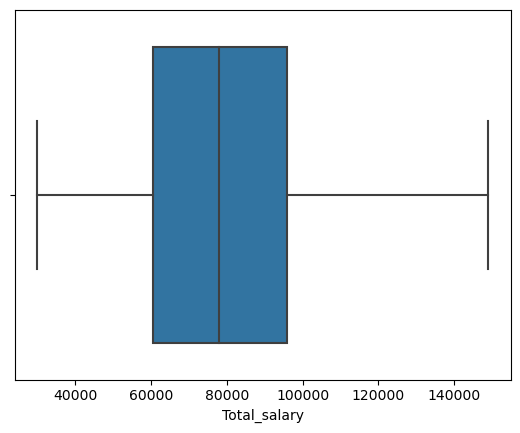

In [44]:
sns.boxplot(data = df, x = 'Total_salary')
plt.show()

- *The outliers are treated and the values are capped*

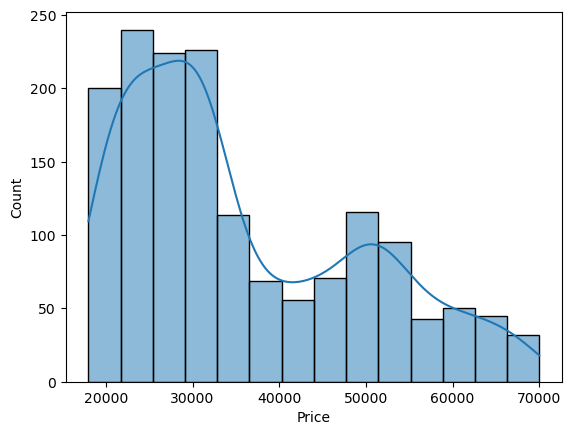

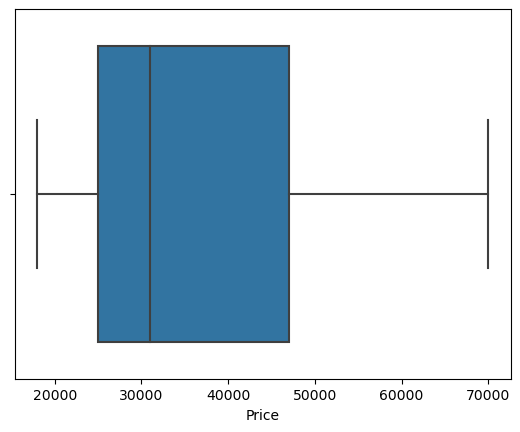

In [45]:
sns.histplot(data= df, x= 'Price', kde = True)
plt.show()
sns.boxplot(data= df, x= 'Price')
plt.show()

- *The Median price of the car between 25,000 to 47,000*
- *The plot is Right skewed which means most of the car price lies on left*

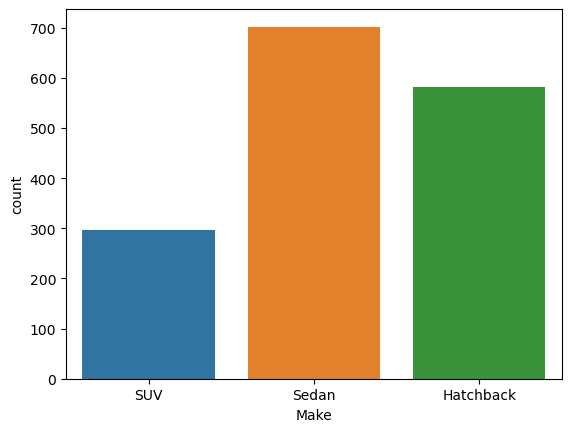

In [46]:
sns.countplot(data= df, x= 'Make')
plt.show()

- *`Sedan` is the most bought car compared to other cars, then `Hatchback` is most sold car and `SUV` is the least sold car compared to other two cars*

## Bivariate analysis

C:\Users\sgopa\AppData\Local\Temp\ipykernel_4988\550020098.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot= True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")


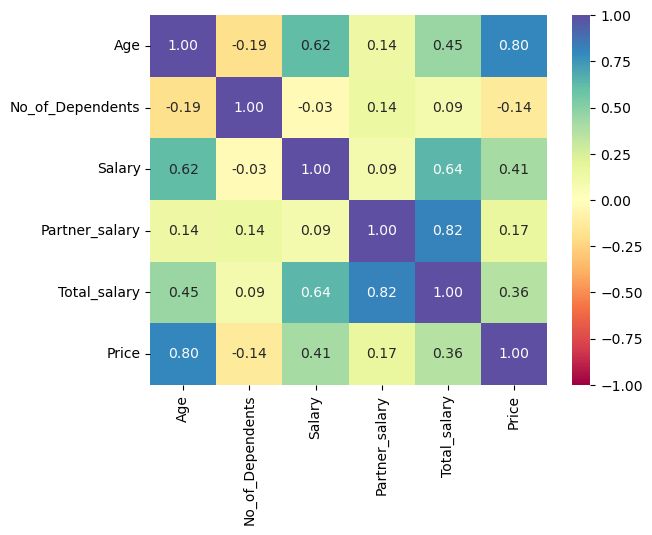

In [47]:
sns.heatmap(df.corr(),annot= True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- *Most of the values are Positively correlated which means we have the trend going upwards*
- *The values `Partner_salary` and `Total_salary` have 0.82 and have high positive correlation* 
- *The values `Age` and `Price` have 0.80 are the two which have high positive correlation*
- *From the above plot we can clearly see that there are only two negatively correlated  plots one is one is `Age` and `No_of_Dependents` and the other is `Price` and `No_of_Dependents`*
- *There is a good correlation between `Age` and `Salary`*
- *All the `Salary`, `Partner_salary` and `Total_salary` column are highly correlated with each other*
- *The Negative correlation for the plots is very minimal with the values -0.14 and -0.19*
- *It is interesting that `Age` and `No_of_Dependents` are negatively correlated (-0.19) but the correlation is close to 0*

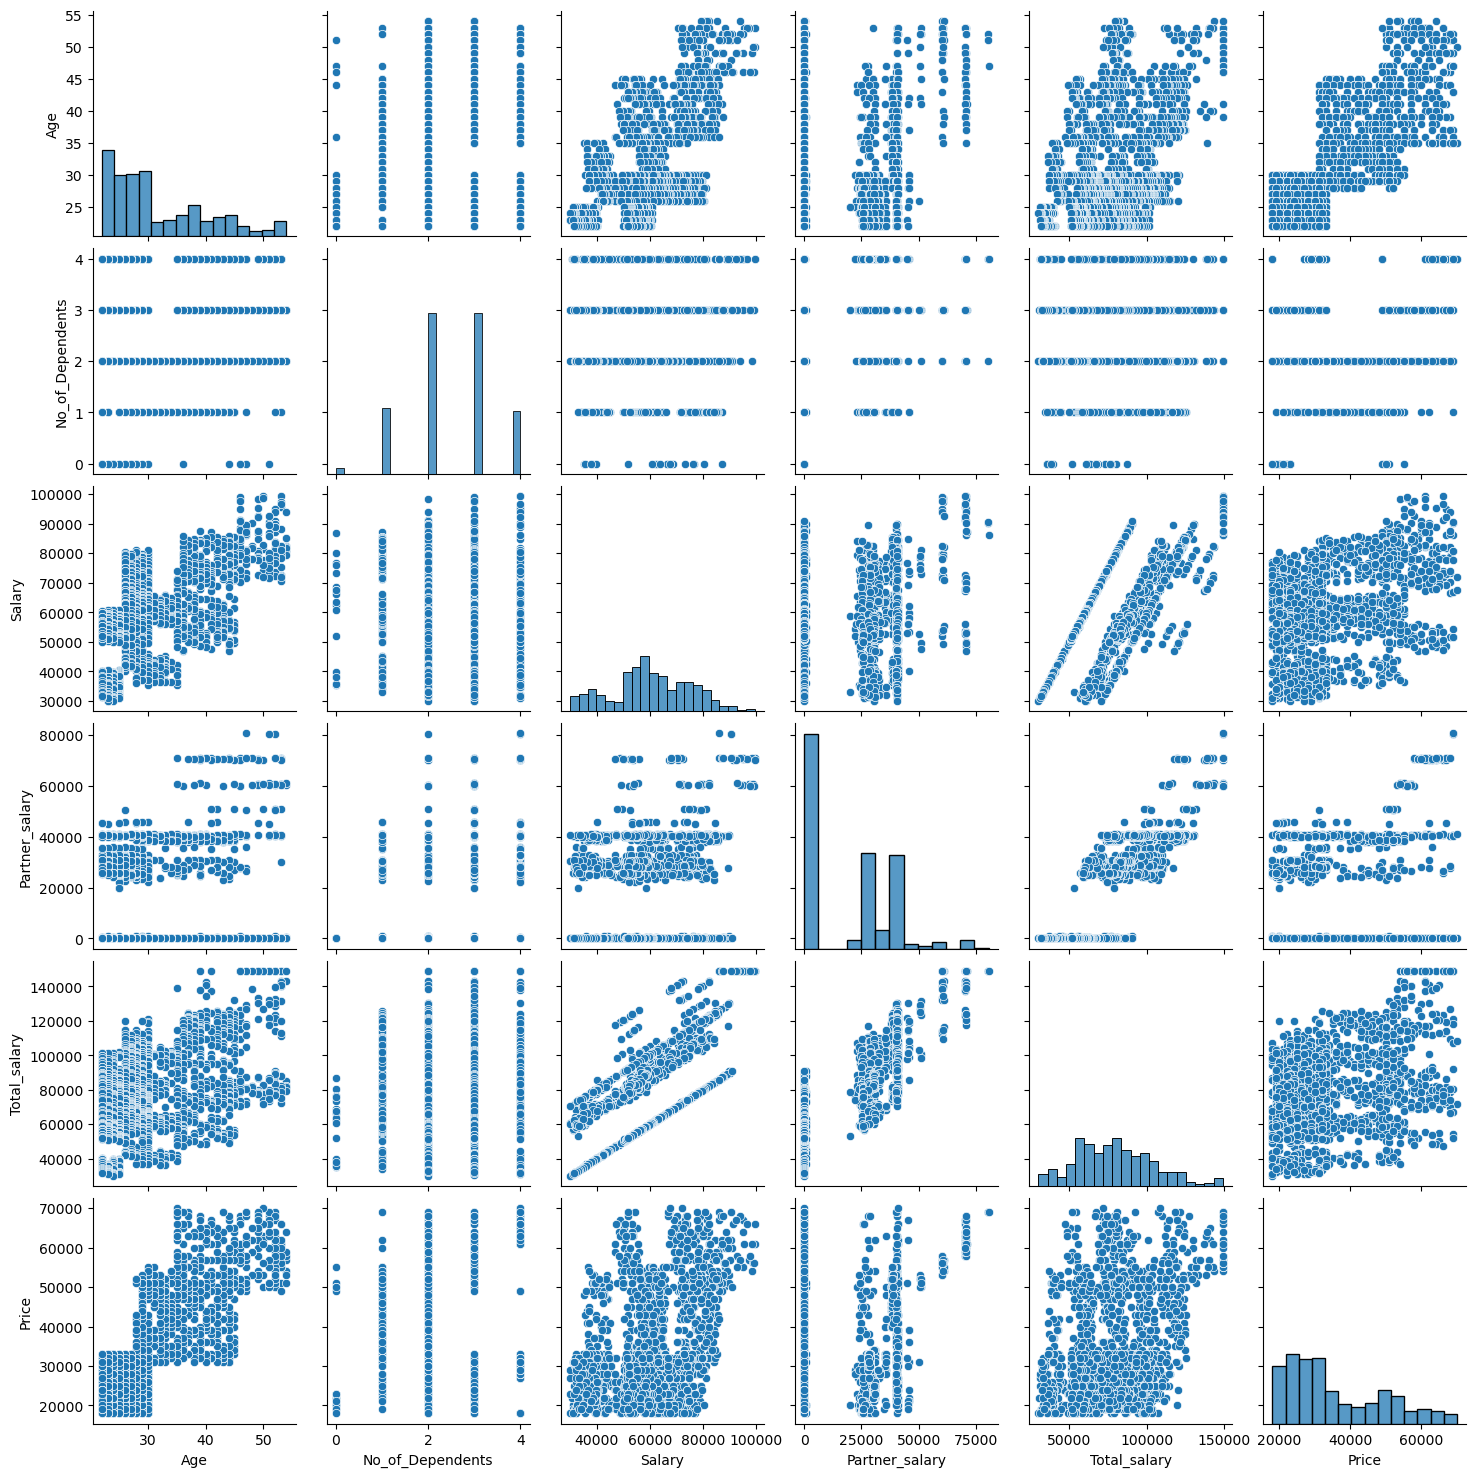

In [48]:
sns.pairplot(data= df)
plt.show()

- *From the above pairplot we can clearly see that there is a positive correlation among many plot*
- *There are some strong relationship among the data which are similar to the data in heatmap*

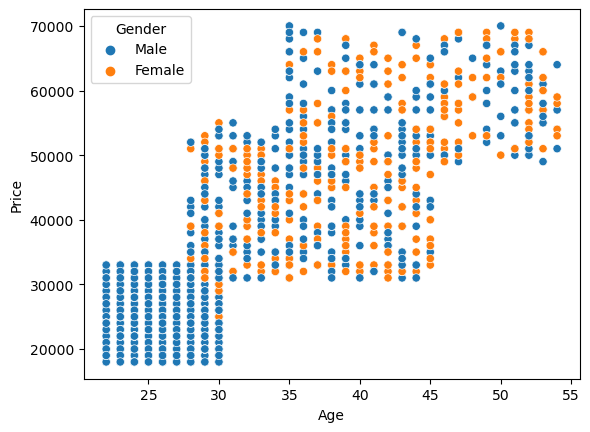

In [77]:
sns.scatterplot(data = df, x= 'Age', y = 'Price', hue= 'Gender')
plt.show()

- *There is an interesting observation here that the female with more aged bought Higher priced car compared to Men.*

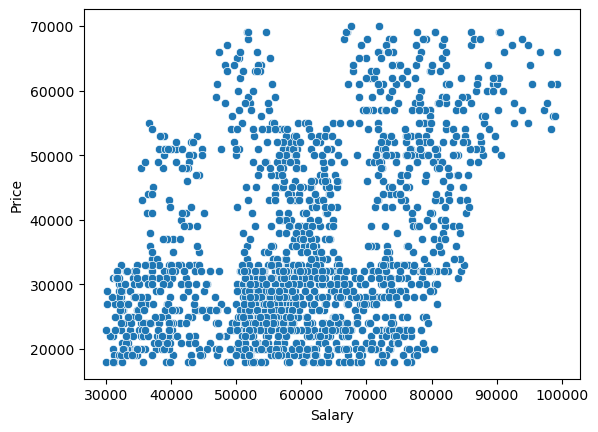

In [84]:
sns.scatterplot(data = df, x='Salary', y='Price')
plt.show()

- *The above plot shows that the people with higher salary can buy higher priced car.*
- *Hence it is Positively correlated.*

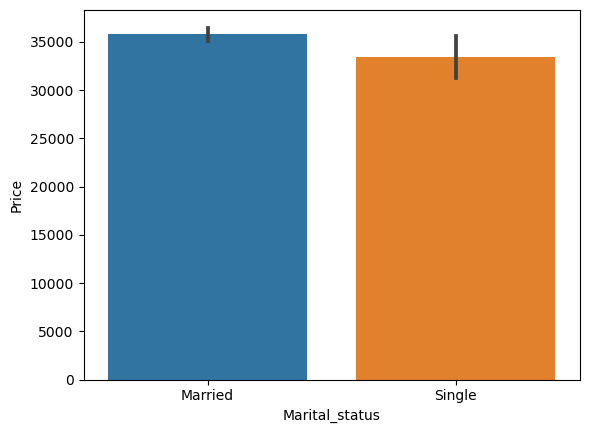

In [51]:
sns.barplot(data = df, x = 'Marital_status', y= 'Price')
plt.show()

- *There isn't much of a relationship between these variables*

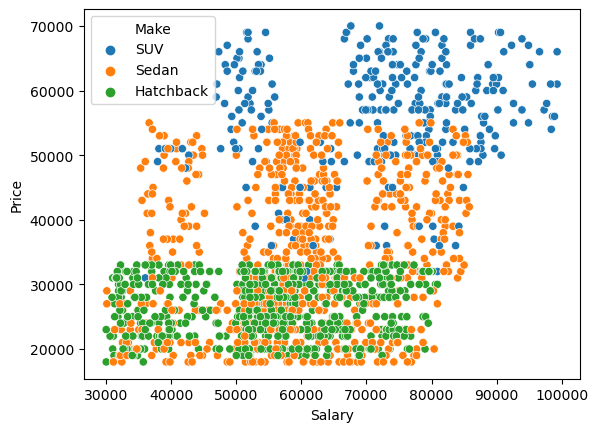

In [85]:
sns.scatterplot(data = df, x='Salary', y='Price', hue = 'Make')
plt.show()

- *People with higher salary buy SUV and next is Sedan and then comes Hatchback*

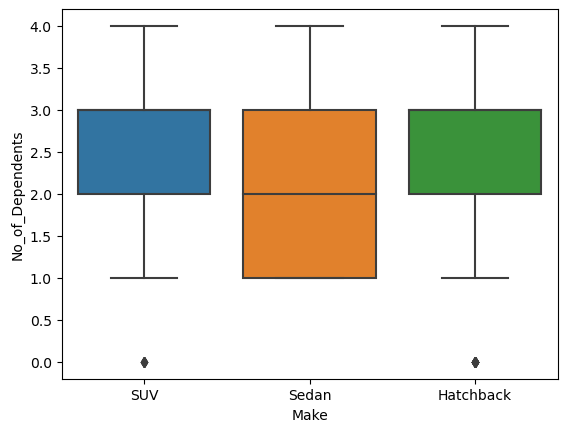

In [53]:
sns.boxplot(data = df, x='Make', y='No_of_Dependents')
plt.show()

- *There are some outliers present in the but `No_of_Dependents` value can be zero since there might not be any dependents for a particular individual*

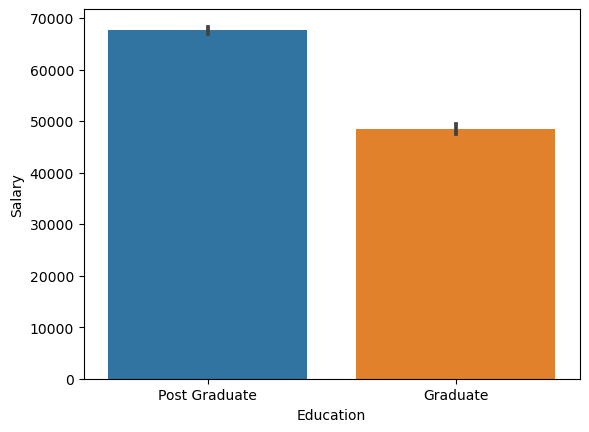

In [54]:
sns.barplot(data = df, x = 'Education', y = 'Salary')
plt.show()

- *We could see the relationship between the Education and the salary of the particular individual*

## Key Questions

### 1. Do men tend to prefer SUVs more compared to women?

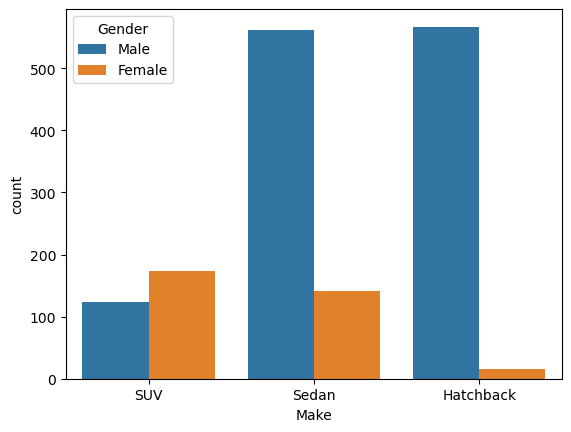

In [55]:
sns.countplot(data = df, x = 'Make', hue= 'Gender')
plt.show()

- *No, from the above plot we can celarly see that Women tend to prefer more SUV than Men*

### 2. What is the likelihood of a salaried person buying a Sedan?

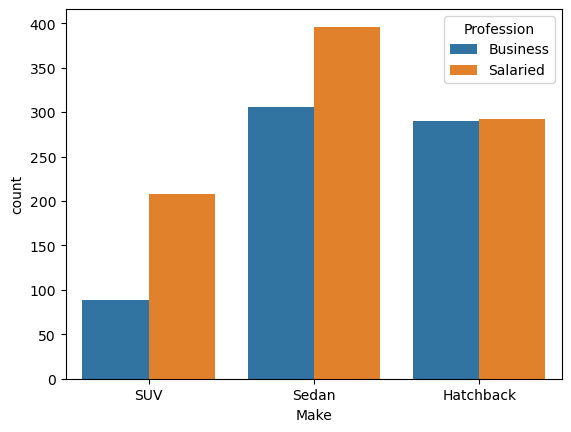

In [56]:
sns.countplot(data = df, x = 'Make', hue= 'Profession')
plt.show()

- *As we can see from the above plot `Salaried` person likes to prefer a Sedan over SUV and Hatchback*

### 3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

In [57]:
df.groupby(['Profession', 'Gender','Make'])['Make'].count()

Profession  Gender  Make     
Business    Female  SUV           55
                    Sedan         50
            Male    Hatchback    290
                    SUV           34
                    Sedan        256
Salaried    Female  Hatchback     15
                    SUV          118
                    Sedan         91
            Male    Hatchback    277
                    SUV           90
                    Sedan        305
Name: Make, dtype: int64

- *As per the above Table Sheldon Cooper's claim seem to be wrong that the Salaried male prefers Sedan over SUV*
- *The above Observation can be used for the analysis for the question asked as answers the previous business questions too*

### 4. How does the amount spent on purchasing automobiles vary by gender?

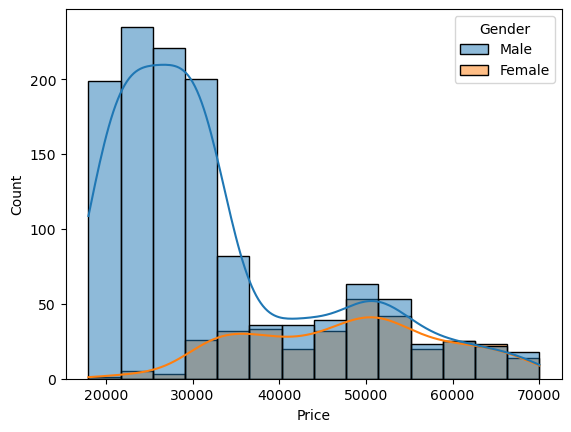

In [58]:
sns.histplot(data= df, hue = 'Gender', x = 'Price', kde = True)
plt.show()

- *From the Above Histogram we can clearly see that Male prefer less priced cars compared to Female*

### 5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

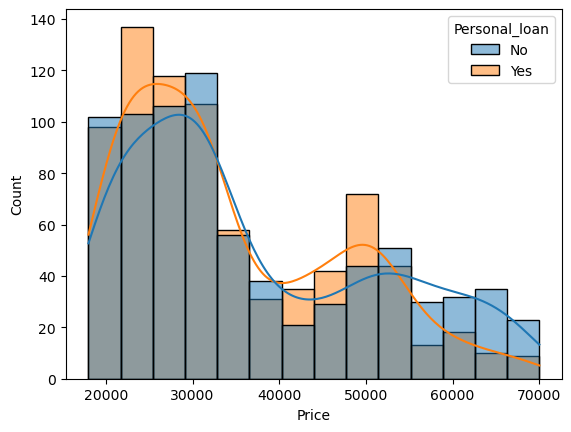

In [86]:
sns.histplot(data= df, hue = 'Personal_loan', x = 'Price', kde = True)
plt.show()

- *From the above histogram and Barplot, we can see that people having Personal loan prefer Low priced cars but the difference is very light*
- *Higher salaried people haven't taken personal loan to buy a higher priced car.*
- *Lower salaried people might have take Personal Loan to buy a car*

In [60]:
df.groupby(['Personal_loan'])['Price'].sum()

Personal_loan
No     28990000
Yes    27290000
Name: Price, dtype: int64

- *The money which is spent on purchasing the Automobiles by individuals who took personal loan is 27290000*

### 6. How does having a working partner influence the purchase of higher-priced cars?

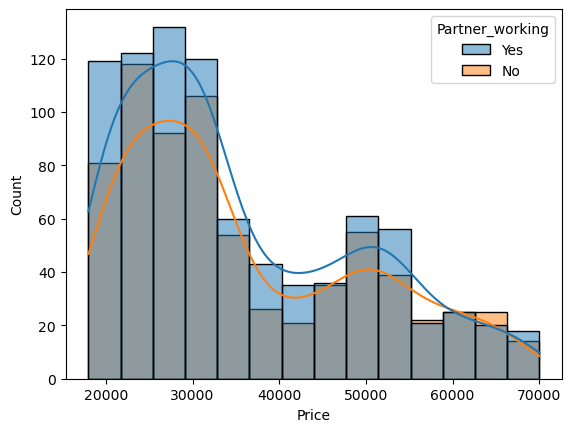

In [61]:
sns.histplot(data = df, x = 'Price', hue = 'Partner_working', kde = True)
plt.show()

- *From the above histogram we can see that individuals having working partner tends to buy Higher priced cars and individuals with partner who is not working likely to buy lower priced car*
- *We can come to a conclusion that People with Working partner tends to buy higher priced car*

### Actionable Insights & Business Recommendations

- *From the above analysis we can clearly see that Male customers are more in number than Female customers, so further analysis is required*

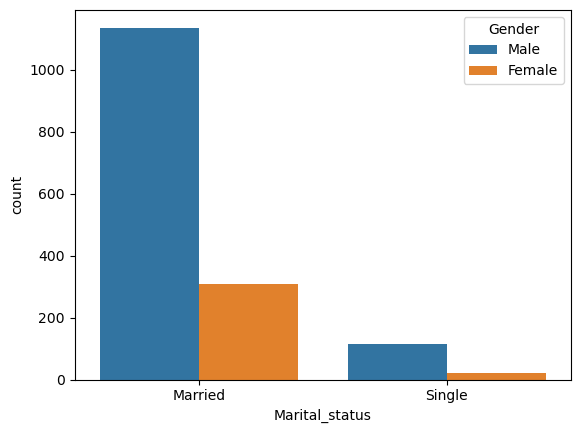

In [62]:
sns.countplot(data = df, hue = 'Gender', x = 'Marital_status')
plt.show()

- *From the above plot we can see that Married Men tend to buy car than Married Female and both single Male and Female*
- *Since Male customers are more in number the marketing team can focus in Single Male customer to gain more profit*

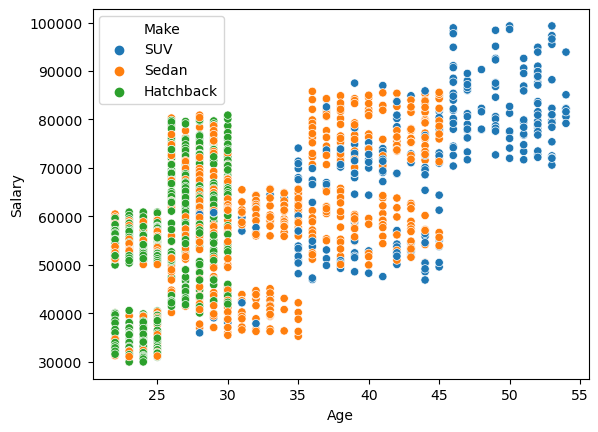

In [63]:
sns.scatterplot(data = df, hue = 'Make', x = 'Age', y = 'Salary')
plt.show()

- *From the above plot we see that people of young age prefer Sedan and Hatchback than SUV.*
- *People of Age category arong 31 to 45 mostly prefer Sedan and SUV.*
- *Aged people above 45 prefer SUV.*
- *This maybe due to young people have Less salary o don't prefer SUV and Middle aged and Aged people might have more salary and No_of_Dependents so they prefer SUV but it is an interesting observation*
- *The Marketing team can focus on attracting people with different Age category by the above observation.*